In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Введение

In [77]:
file_path = "data (2).xlsx"
read_df = pd.read_excel(file_path)
df = read_df[1:].T[4:60].rename(columns = {1:"Year" ,2:"USA", 3:"France"}).reset_index(drop=True)

# Исходные данные

тут насрать текста 

# Основные компоненты временного ряда

## 3.1

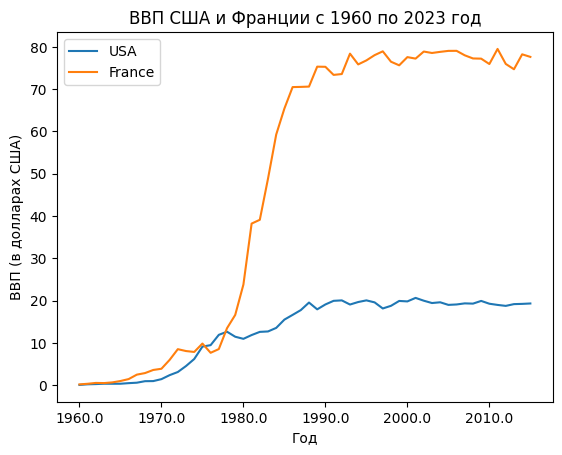

In [79]:
df.plot(x='Year', y=['USA', 'France'], kind='line')
plt.title('ВВП США и Франции с 1960 по 2023 год')
plt.ylabel('ВВП (в долларах США)')
plt.xlabel('Год')
plt.show()


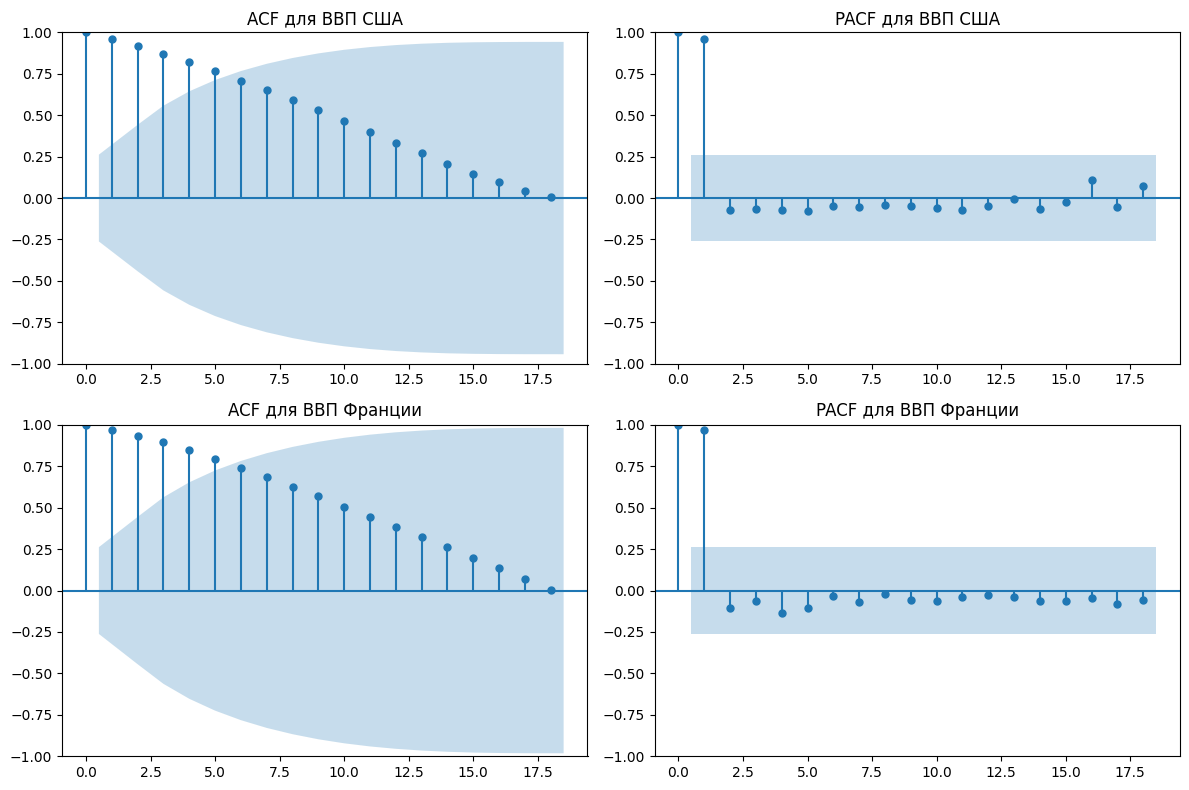

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ACF для США
plot_acf(df['USA'].values.squeeze(), ax=axes[0, 0], title='ACF для ВВП США')

# PACF для США
plot_pacf(df['USA'].values.squeeze(), ax=axes[0, 1], title='PACF для ВВП США')

# ACF для Франции
plot_acf(df['France'], ax=axes[1, 0], title='ACF для ВВП Франции')

# PACF для Франции
plot_pacf(df['France'], ax=axes[1, 1], title='PACF для ВВП Франции')

# Настройка расположения графиков
plt.tight_layout()
plt.show()



## 3.2

In [81]:
from statsmodels.tsa.stattools import kpss

# Для США
kpss_test_usa = kpss(df['USA'])
print('KPSS Statistic: %f' % kpss_test_usa[0])
print('p-value: %f' % kpss_test_usa[1])
print('Critical Values:')
for key, value in kpss_test_usa[3].items():
    print('\t%s: %.3f' % (key, value))

# Для Франции
kpss_test_france = kpss(df['France'])
print('KPSS Statistic: %f' % kpss_test_france[0])
print('p-value: %f' % kpss_test_france[1])
print('Critical Values:')
for key, value in kpss_test_france[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 1.059654
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
KPSS Statistic: 1.072875
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/rx/7jdln1v12dqfpp7h7t6hvf0s3my5pf/T/ipykernel_45109/4041580573.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_usa = kpss(df['USA'])
/var/folders/rx/7jdln1v12dqfpp7h7t6hvf0s3my5pf/T/ipykernel_45109/4041580573.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_france = kpss(df['France'])


тут насрать текста

## 3.3

In [85]:
from arch.unitroot import StructuralBreak

# Создадим модель для тестирования
break_test_usa = StructuralBreak(df['USA'])

# Выведем результаты теста
print(break_test_usa.break_test())



ImportError: cannot import name 'StructuralBreak' from 'arch.unitroot' (/Users/semyonemakov/minor_modul_task/.venv/lib/python3.10/site-packages/arch/unitroot/__init__.py)